In [1]:
import numpy
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import fastf1
import fastf1.plotting
import csv
import os
import sys
from pathlib import Path
import json

In [2]:
root_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Add it to Python's search path if it's not already there
if root_path not in sys.path:
    sys.path.append(root_path)

# Now Python can see 'Utilities'
from Utilities.CornerUtils import CircuitAnalyzer
from Utilities.TimingUtils import TimingAnalyzer
from Utilities.TelemetryUtils import TelemetryAnalyzer
from Utilities.StraightUtils import StraightAnalyzer
from Utilities.TrackUtils import TrackAnalyzer

In [3]:
fastf1.plotting.setup_mpl()

In [4]:
# Load the Race session for Las Vegas 2025.

print("Loading session data...")
session = fastf1.get_session(2025, "Las Vegas", "R")
session.load()
print("Session loaded.")

req         WARNING 	DEFAULT CACHE ENABLED! (103.82 MB) /home/moreno/.cache/fastf1
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '63'


Loading session data...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '12', '16', '55', '6', '27', '44', '31', '87', '14', '22', '10', '30', '43', '23', '5', '18', '4', '81']


Session loaded.


In [5]:
Timing = TimingAnalyzer(session)
Corner = CircuitAnalyzer(session)
Tel = TelemetryAnalyzer(session)
Straight = StraightAnalyzer(session)
Track = TrackAnalyzer(session)

Initializing CircuitAnalyzer: Pre-filtering laps...
Initializing StraightAnalyzer: Pre-filtering laps...


Calculating Delta: VER (Ref) vs NOR...


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


Saved LasVegasGrandPrix2025_R_Telemetry_Delta_VER_vs_NOR.png


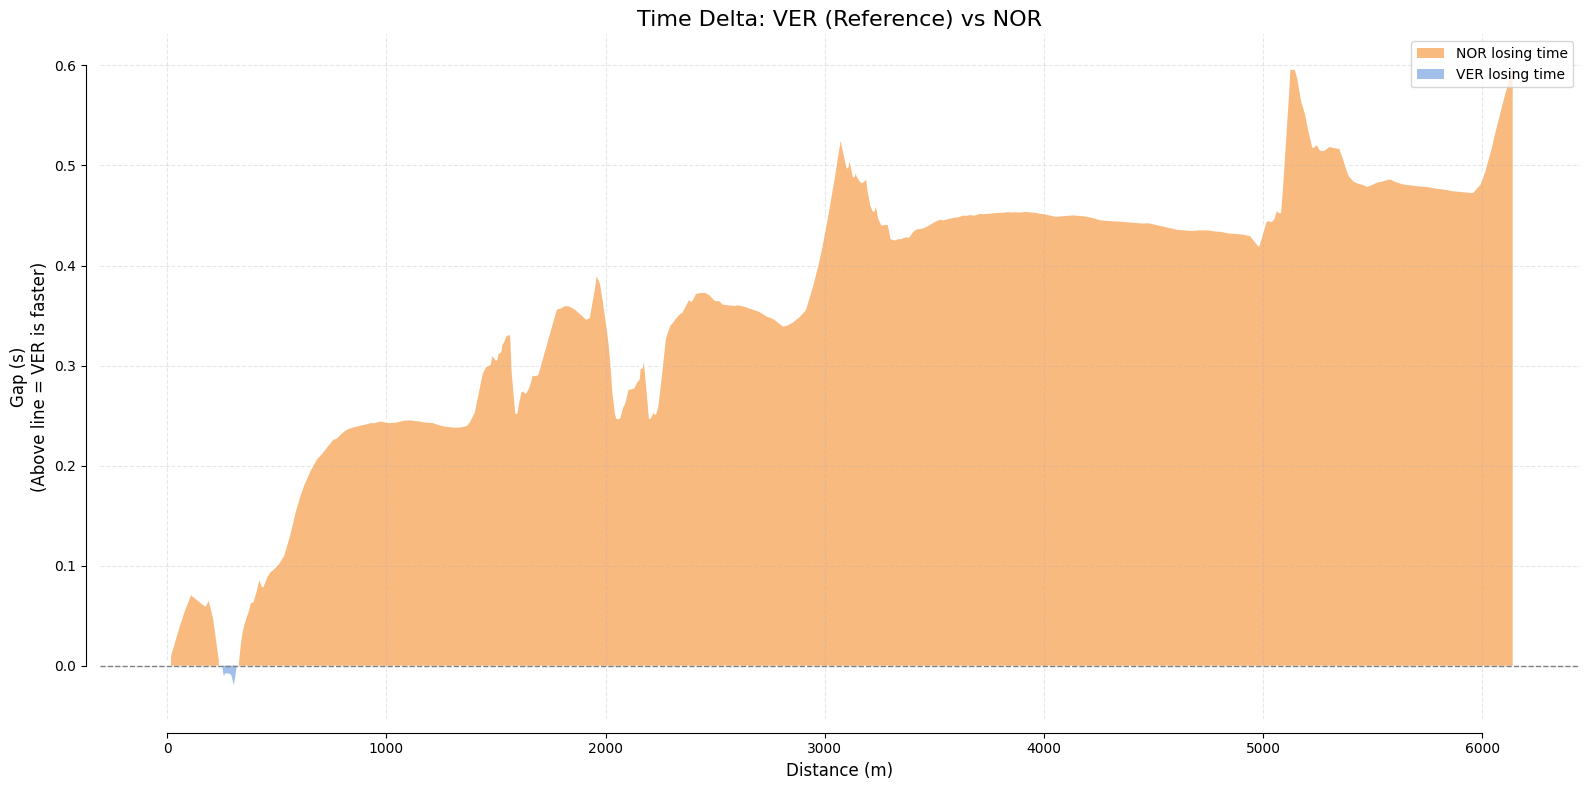

In [9]:
Tel.delta_to_driver(ref_driver='VER', comp_driver='NOR')

Generating Pace Distribution Boxplot...


/home/moreno/Projects/F1_Analysis/Utilities/TimingUtils.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Saved LasVegasGrandPrix2025_R_Timing_PaceDistribution.png


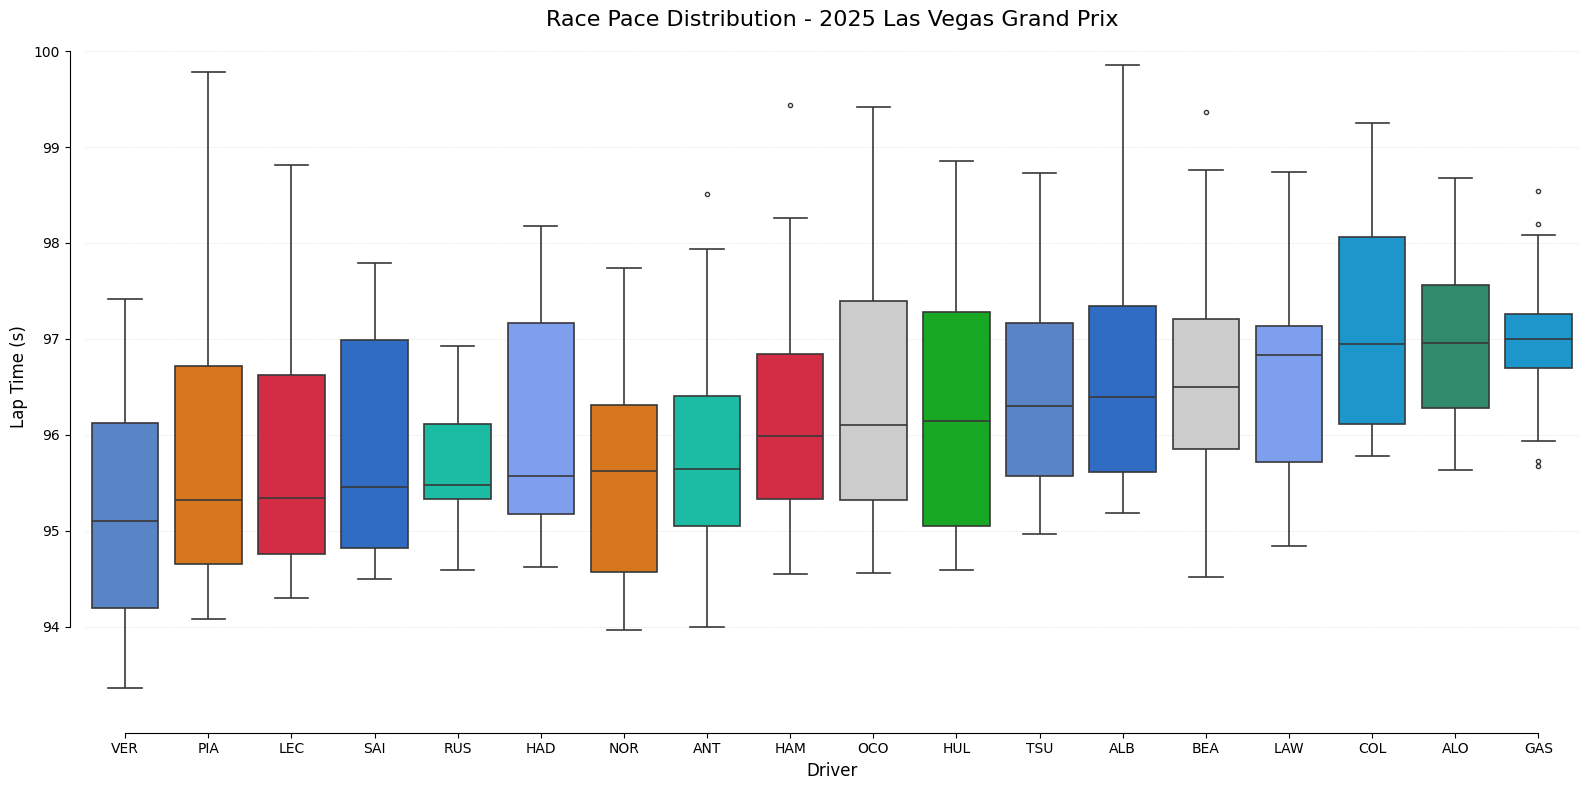

In [7]:
Timing.pace_distribution()

In [ ]:
Corner.entry.velo_dist(1)

Analyzing Average Apex Speed across ALL corners...


/home/moreno/Projects/F1_Analysis/Utilities/CornerUtils.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Plot saved to LasVegasGrandPrix2025_R_AllCorners_ApexSpeed.png


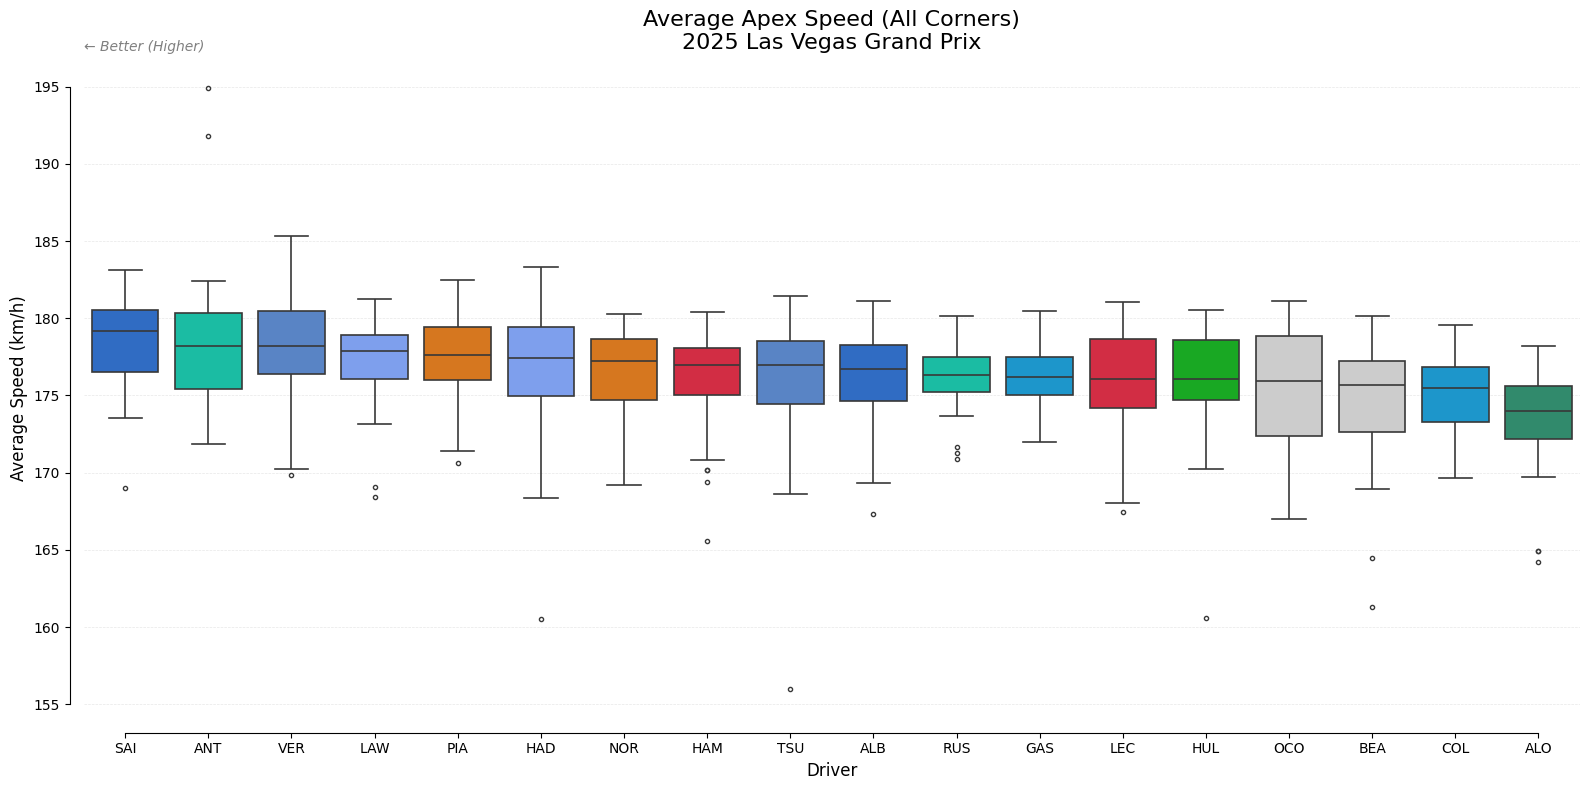

In [6]:
Corner.all.velo_dist()

Analyzing Max Speed between Turn 12 and Turn 14...


/home/moreno/Projects/F1_Analysis/Utilities/StraightUtils.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Plot saved to LasVegasGrandPrix2025_R_Straight_VMax_T12_T14.png


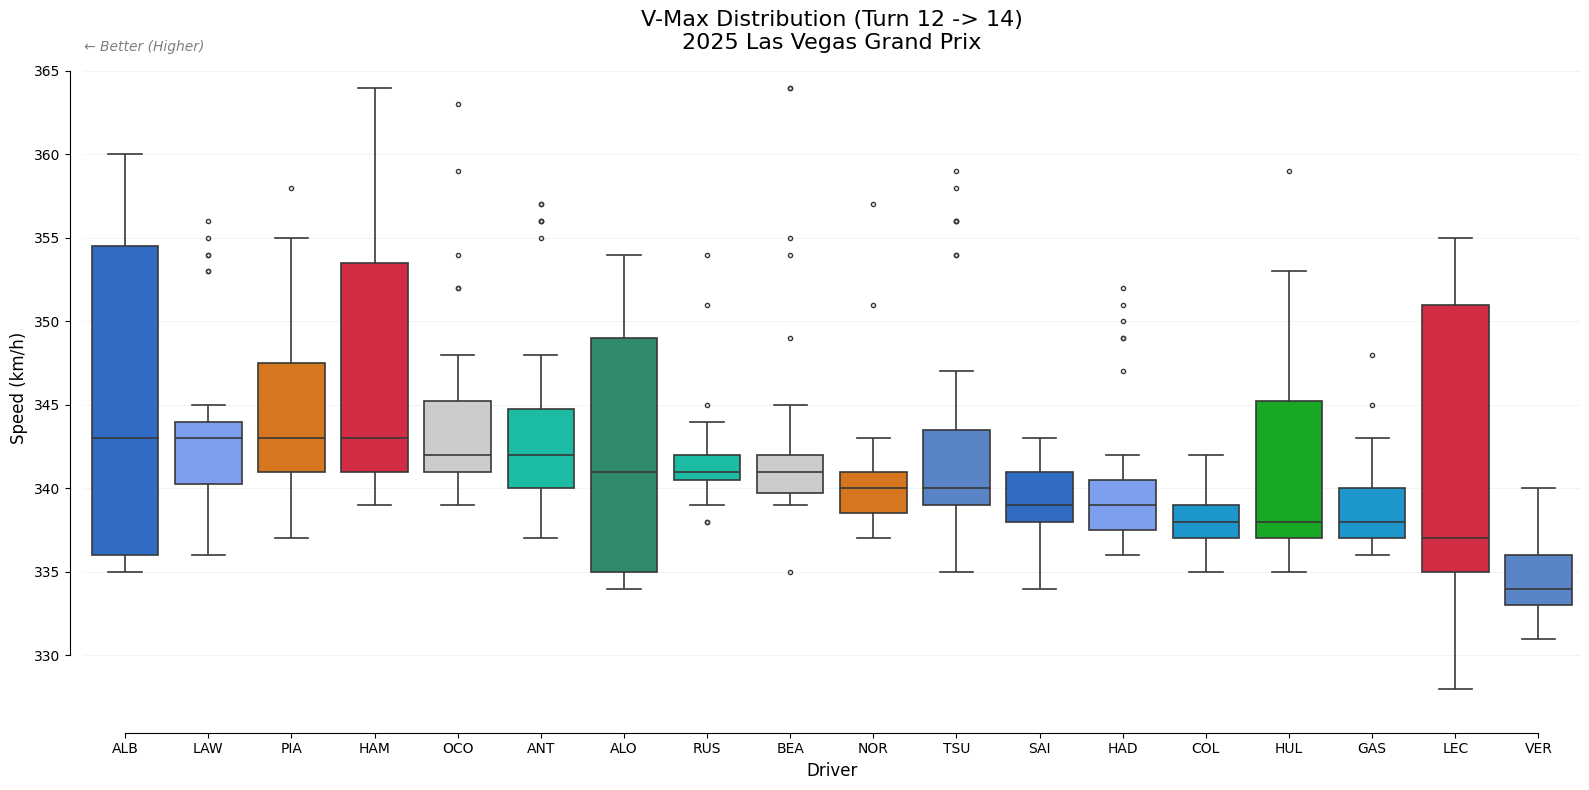

Analyzing Acceleration (100->200 kph) after Turn 3...


/home/moreno/Projects/F1_Analysis/Utilities/StraightUtils.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Plot saved to LasVegasGrandPrix2025_R_Straight_Accel_T3.png


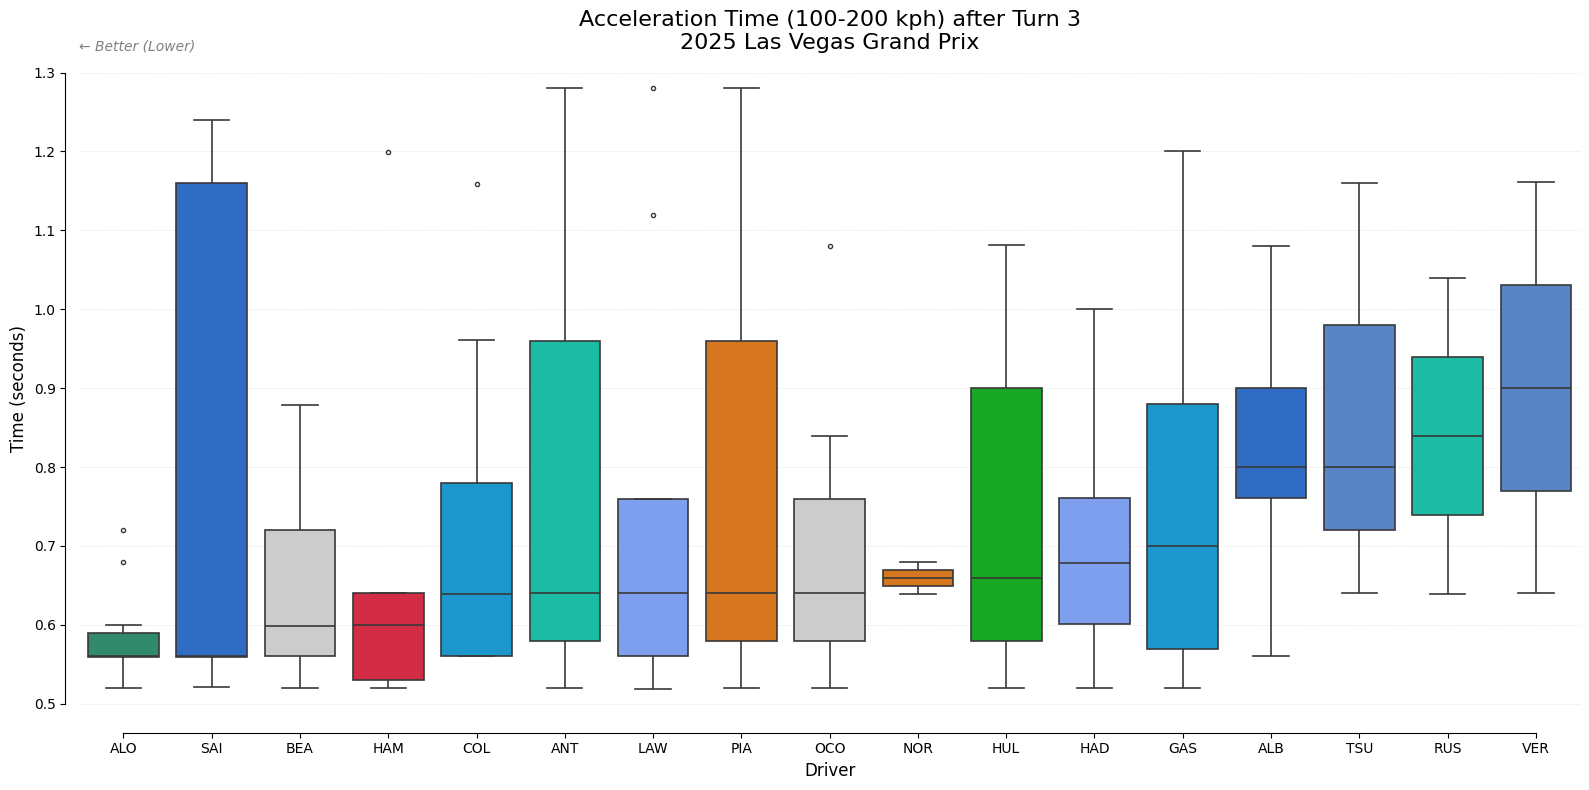

In [7]:
# 1. Analyze the Las Vegas Strip Top Speed (Turn 12 -> 14)
# This will show who has the lowest drag / best engine
Straight.speed.vmax_dist(start_turn=12, end_turn=14)

# 2. Analyze Acceleration out of Turn 3
# How fast do they get from 100kph to 200kph?
# This shows traction and low-end power
Straight.accel.time_to_speed(100, 200, after_turn=3)

Analyzing Max Speed between Turn 3 and Turn 5...


/home/moreno/Projects/F1_Analysis/Utilities/StraightUtils.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Plot saved to LasVegasGrandPrix2025_R_Straight_VMax_T3_T5.png


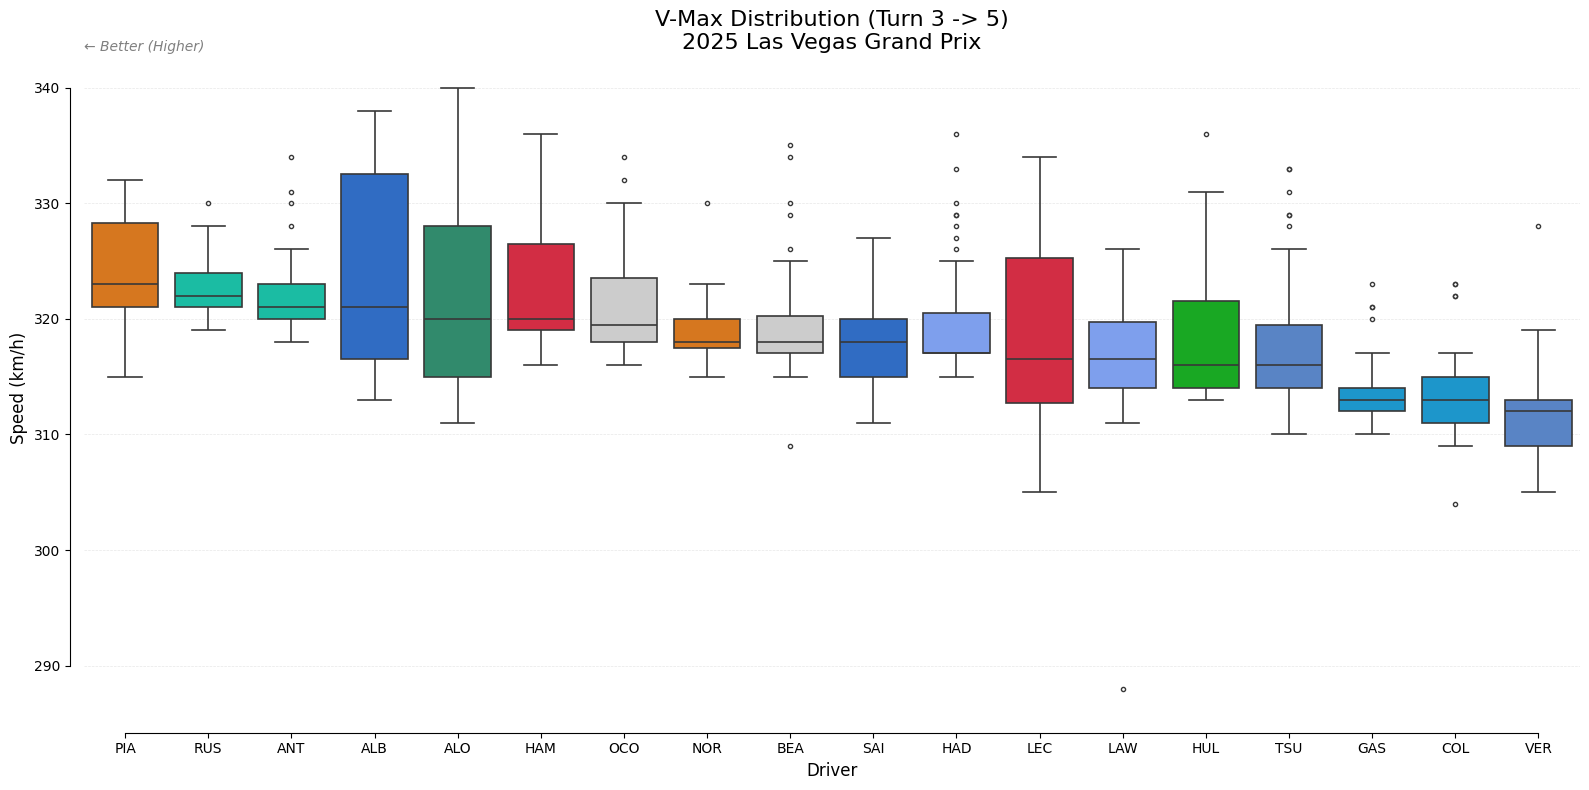

In [8]:
Straight.speed.vmax_dist(start_turn=3, end_turn=5)

In [6]:
Track.gain.map(ref_driver='VER', comp_driver='NOR')

Generating Gain Map: VER vs NOR...


/home/moreno/Projects/F1_Analysis/.venv/lib/python3.12/site-packages/fastf1/utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


KeyError: 'X'